In [122]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import random
from scipy import stats
plt.style.use('ggplot')

In [129]:
file_name = "../data/GEM 2016 APS Global - Individual Level Data.sav"
df, meta = pyreadstat.read_sav(file_name)

In [130]:
df.head()

,country,ctryalp,CAT_GCR1,CAT_GCR2,yrsurv,setid,ID,weight,WEIGHT_L,WEIGHT_A,...,TEAEXPST,TEAEXPWK,IPACT_ALL,IPACT_EMP,IPACTNOW_ALL,IPACTNOW_EMP,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
0,1.0,US,5.0,3.0,2016.0,1.161000e+09,1000043.0,0.554987,0.529262,0.554987,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,US,5.0,3.0,2016.0,1.161000e+09,1000104.0,1.132633,1.080133,1.132633,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,US,5.0,3.0,2016.0,1.161000e+09,1000111.0,1.216468,1.160082,1.216468,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,1.0,US,5.0,3.0,2016.0,1.161000e+09,1000385.0,0.658882,NaN,0.658882,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,1.0,US,5.0,3.0,2016.0,1.161000e+09,1000442.0,0.749167,NaN,0.749167,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [131]:
# saving for a later df ['UNEDUC']['GEMHHINC']['gender']['age']['BUSOWNER']
# df_2016.loc[df_2016['ctryalp'] == 'UK']

#create a data frame with country, perception of opportunity and fear of failure for analysis

indexed_df = df[['ctryalp', 'opport', 'fearfail', 'gender', 'age', 'UNEDUC', 'knowent', 'suskill', 'GEMHHINC']]



In [132]:
# verify pre-cleaning number of rows
indexed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194824 entries, 0 to 194823
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ctryalp   194824 non-null  object 
 1   opport    163167 non-null  float64
 2   fearfail  187295 non-null  float64
 3   gender    194820 non-null  float64
 4   age       192573 non-null  float64
 5   UNEDUC    192559 non-null  float64
 6   knowent   191994 non-null  float64
 7   suskill   187698 non-null  float64
 8   GEMHHINC  159673 non-null  float64
dtypes: float64(8), object(1)
memory usage: 13.4+ MB


In [133]:
# remove rows containing NaN values

cleaned_df = indexed_df.dropna()

In [134]:
# verify number of rows after NaN rows have been removed

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126608 entries, 0 to 194823
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ctryalp   126608 non-null  object 
 1   opport    126608 non-null  float64
 2   fearfail  126608 non-null  float64
 3   gender    126608 non-null  float64
 4   age       126608 non-null  float64
 5   UNEDUC    126608 non-null  float64
 6   knowent   126608 non-null  float64
 7   suskill   126608 non-null  float64
 8   GEMHHINC  126608 non-null  float64
dtypes: float64(8), object(1)
memory usage: 9.7+ MB


In [135]:
cleaned_df.head()

,ctryalp,opport,fearfail,gender,age,UNEDUC,knowent,suskill,GEMHHINC
0,US,0.0,1.0,2.0,63.0,3.0,0.0,1.0,33.0
1,US,0.0,1.0,1.0,52.0,4.0,0.0,1.0,68100.0
2,US,1.0,0.0,2.0,64.0,5.0,0.0,0.0,3467.0
3,US,0.0,0.0,2.0,70.0,4.0,0.0,0.0,3467.0
5,US,0.0,1.0,1.0,57.0,5.0,0.0,1.0,33.0


In [13]:
# create contingency table

conting_t = pd.crosstab(cleaned_df['opport'], cleaned_df['fearfail'])
conting_t

fearfail,0.0,1.0
opport,,
0.0,40614,32725
1.0,34400,18869


In [14]:
# calculate the p-value using Fisher's exact test

pvalue = stats.fisher_exact(conting_t)
pvalue

(0.6807482775774157, 1.9851627013826236e-238)

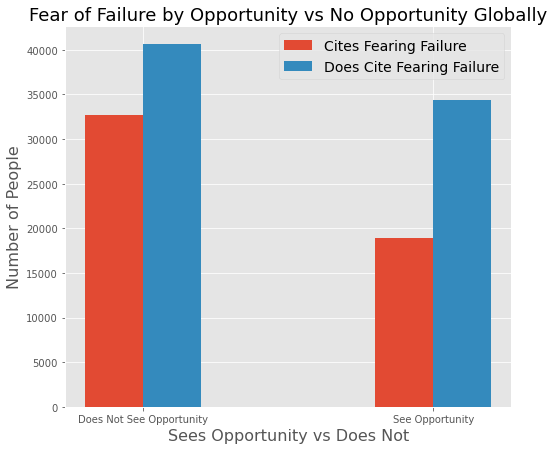

In [96]:
# create a histogram for fear of failure vs opportunity 

labels = ['Does Not See Opportunity', 'See Opportunity']

yes_fear_bar = cleaned_df[cleaned_df['fearfail'] == 1.0]['opport'].value_counts()
no_fear_bar = cleaned_df[cleaned_df['fearfail'] == 0.0]['opport'].value_counts()


x = np.arange(len(labels))

width = 0.20

fig, ax = plt.subplots(figsize=(8, 7))
rects1 = ax.bar(x - width/2, yes_fear_bar, width, label="Cites Fearing Failure")
rects2 = ax.bar(x + width/2, no_fear_bar, width, label="Does Cite Fearing Failure")

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People', fontsize=16)
ax.set_xlabel('Sees Opportunity vs Does Not', fontsize=16)
ax.set_title('Fear of Failure by Opportunity vs No Opportunity Globally', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=14)


plt.savefig('img/fisher_hist.png')

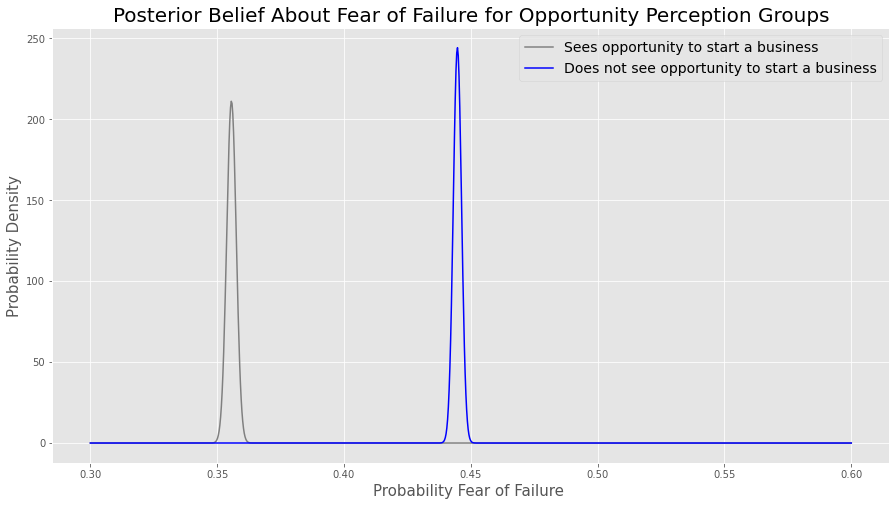

In [146]:
# calculate and plot a bayes A/B test comparing two groups (one that sees opportunity and one that doesn't) in if they cite fear as the reason that prevents them from starting a business
probs = np.linspace(0.3, 0.6, 1000)


# people who do not see opportunities around them - % of people who have a fear of failure
no_opport_dist = stats.beta(a=1+41192, b=1+51434) #success = Opport: 0, Fear: 1 failure = Opport: 0, Fear: 0
# people who do see opportunity around them - % of people who have a fear of failure
yes_opport_dist = stats.beta(a=1+22869, b=1+41437)
#success = Opport: 1, Fear: 1 failure = Opport: 1, Fear: 0

# fear of opport = yes

densities_yes_opport = yes_opport_dist.pdf(probs)
densities_no_opport = no_opport_dist.pdf(probs)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(probs, densities_yes_opport, color='grey', label='Sees opportunity to start a business')
ax.plot(probs, densities_no_opport, color='blue', label='Does not see opportunity to start a business')
#ax.fill_between(probs, densities, color='lightseagreen', alpha=.8)
ax.set_title(f'Posterior Belief About Fear of Failure for Opportunity Perception Groups', fontsize=20)
ax.set_xlabel('Probability Fear of Failure ', fontsize=15)
ax.set_ylabel('Probability Density', fontsize=15);

ax.legend(loc="upper right", fontsize=14)

plt.savefig('img/Bayes_AB_prob.png')

In [148]:
# What is the probability I will have fear of failure if I do not perceive opportunity?

# distribution of fear for people who do not see opportunity around them
no_opport_dist = np.random.beta(a=1+41192, b=1+51434, size=10000) #success = Opport: 0, Fear: 1 failure = Opport: 0, Fear: 0

# distribution of fear for people who do see opportunity around them 
yes_opport_dist = np.random.beta(a=1+22869, b=1+41437, size=10000)
#success = Opport: 1, Fear: 1 failure = Opport: 1, Fear: 0


# find propobility of fear of failure being greater when perception of opportunity is not present
prob = (no_opport_dist > yes_opport_dist).mean() * 100
prob

100.0

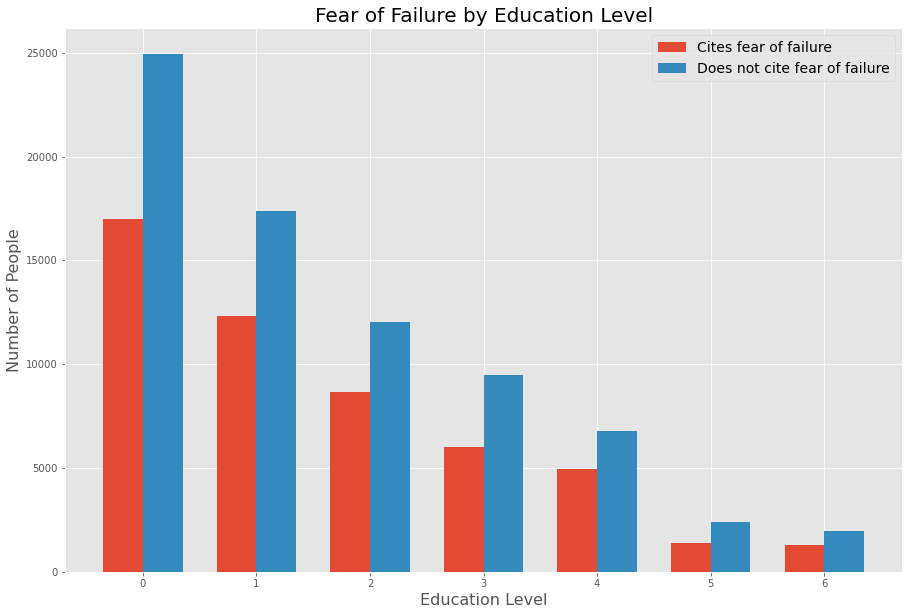

In [149]:
# create a histogram for fear of failure vs education level

labels = [0, 1, 2, 3, 4, 5, 6]

yes_fear_bar = cleaned_df[cleaned_df['fearfail'] == 1.0]['UNEDUC'].value_counts()
no_fear_bar = cleaned_df[cleaned_df['fearfail'] == 0.0]['UNEDUC'].value_counts()
yes_fear_bar

x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, yes_fear_bar, width, label="Cites fear of failure")
rects2 = ax.bar(x + width/2, no_fear_bar, width, label="Does not cite fear of failure")

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People', fontsize=16)
ax.set_xlabel('Education Level', fontsize=16)
ax.set_title('Fear of Failure by Education Level', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=14)

plt.savefig('img/Fear_education.png')
